In [2]:
import os
import re
import pandas as pd

# Directory containing the .txt files
directory = r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals'

# List to store data from each file
data = []

# Regex patterns to match the parameters
patterns = {
    'num_layers': r'num_layers:\s*(\d+)',
    'neurons_per_layer': r'neurons_per_layer:\s*\[(.*?)\]',
    'activation_functions': r'activation_functions:\s*\[(.*?)\]',
    'optimizer': r'optimizer:\s*([a-zA-Z0-9_]+)',
    'alpha': r'alpha:\s*([\d.]+)',
    'loss_function': r'loss_function:\s*([a-zA-Z0-9_]+)',
    'accuracy': r'accuracy:\s*([\d.-]+)',
}

# Function to read and parse each file
def parse_txt_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        params = {}
        for key, pattern in patterns.items():
            match = re.search(pattern, content)
            if match:
                if key in ['neurons_per_layer', 'activation_functions']:
                    params[key] = eval('[' + match.group(1) + ']')
                else:
                    params[key] = match.group(1)
            else:
                params[key] = None
        return params

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt') and 'params' in filename:
        file_path = os.path.join(directory, filename)
        params = parse_txt_file(file_path)
        params['filename'] = filename  # Add filename to parameters
        data.append(params)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Define the order of columns as specified
desired_columns = ['num_layers', 'neurons_per_layer', 'activation_functions',
                   'optimizer', 'alpha', 'loss_function', 'accuracy', 'filename']
df = df[desired_columns]

# Remove rows with NaN values
df_ = df.dropna()

# Output Excel file path
output_excel_file = r'output.xlsx'

# Write DataFrame to Excel
df_.to_excel(output_excel_file, index=False)

print(f"Data has been successfully written to {output_excel_file}")


Data has been successfully written to output.xlsx


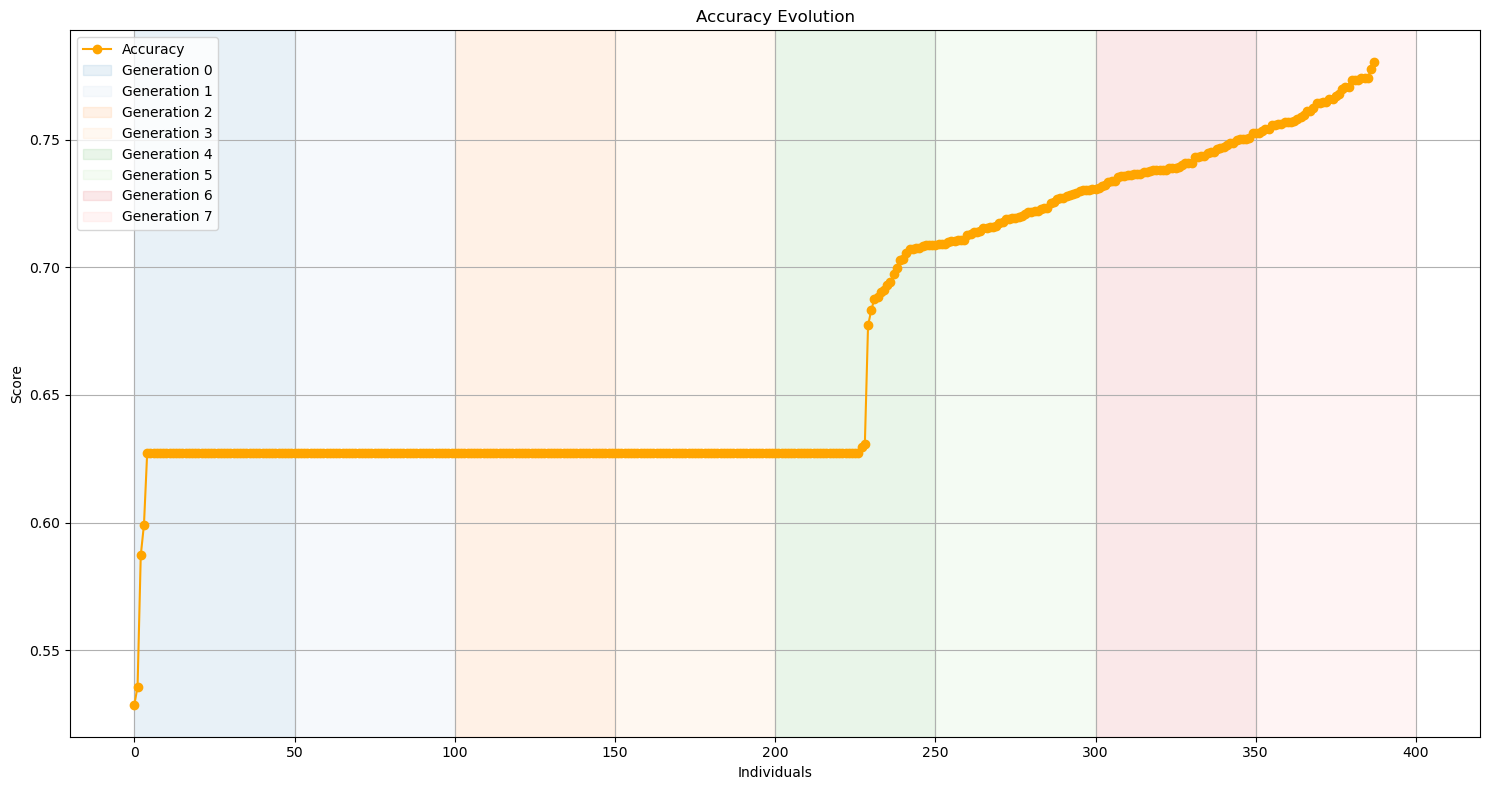

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('output.xlsx')
df = df[df['accuracy'] >0.3].sort_values(by='accuracy', ascending=True)


# Строим график
plt.figure(figsize=(15, 8))

epochs = np.arange(df.shape[0])

# Кривые для validation
#plt.plot(epochs, df['f1_score'], marker='o', linestyle='-', color='blue', label='$F_1$ Score')
plt.plot(epochs, df['accuracy']+0.2, marker='o', linestyle='-', color='orange', label='Accuracy')
#plt.plot(epochs, df['precision'], marker='o', linestyle='-', color='green', label='Precision')
#plt.plot(epochs, df['recall'], marker='o', linestyle='-', color='red', label='Recall')

# Кривые для test
#plt.plot(epochs, df['test_accuracy'], marker='o', linestyle='-', color='red', label='test_accuracy')
#plt.plot(epochs, df['test_precision'], marker='o', linestyle='-', color='purple', label='test_precision')
#plt.plot(epochs, df['test_recall'], marker='o', linestyle='-', color='brown', label='test_recall')

# Добавление фона с номерами
#plt.axvspan(0, 19, color='blue', alpha=0.1, label='Generation 0')

for i in range(0, df.shape[0], 50):
    plt.axvspan(i, i + 50, color=plt.cm.tab20(i // 50), alpha=0.1, label=f'Generation {i // 50}')


# Настройки графика
plt.title('Accuracy Evolution')
plt.xlabel('Individuals')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.savefig('indiv.pdf')
plt.show()

In [5]:
df_size = pd.read_excel('output_size.xlsx')

In [7]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('output_size.xlsx')
df = df[df['accuracy'] >0.3].sort_values(by='accuracy', ascending=True)

df_ = pd.read_excel('output.xlsx')
df_ = df_[df_['accuracy'] >0.3].sort_values(by='accuracy', ascending=True)

# Строим график
plt.figure(figsize=(15, 8))

epochs = np.arange(df.shape[0])

epochs_ = np.arange(df_.shape[0])

# Кривые для validation
#plt.plot(epochs, df['f1_score'], marker='o', linestyle='-', color='blue', label='$F_1$ Score')
plt.plot(epochs, df['accuracy']+0.1, marker='o', linestyle='-', color='orange', label='Accuracy for Landslide Size')
plt.plot(epochs_, df_['accuracy']+0.1, marker='o', linestyle='-', color='green', label='Accuracy for Landslide trigger')
#plt.plot(epochs, df['precision'], marker='o', linestyle='-', color='green', label='Precision')
#plt.plot(epochs, df['recall'], marker='o', linestyle='-', color='red', label='Recall')

# Кривые для test
#plt.plot(epochs, df['test_accuracy'], marker='o', linestyle='-', color='red', label='test_accuracy')
#plt.plot(epochs, df['test_precision'], marker='o', linestyle='-', color='purple', label='test_precision')
#plt.plot(epochs, df['test_recall'], marker='o', linestyle='-', color='brown', label='test_recall')

# Добавление фона с номерами
#plt.axvspan(0, 19, color='blue', alpha=0.1, label='Generation 0')

for i in range(0, df.shape[0], 50):
    plt.axvspan(i, i + 50, color=plt.cm.tab20(i // 50), alpha=0.1, label=f'Generation {i // 50}')


# Настройки графика
plt.title('Accuracy Evolution')
plt.xlabel('Individuals')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# Отображение графика
plt.tight_layout()
#plt.savefig('indiv_all.pdf')
plt.show()

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [3]:
import pandas as pd
df = pd.read_excel('output_size.xlsx')
df = df[df['accuracy'] >0.3].sort_values(by='accuracy', ascending=True)
df_best = df[df['accuracy'] >0.711]
df_best

,num_layers,neurons_per_layer,activation_functions,optimizer,alpha,loss_function,accuracy,filename
212,9,"[72, 94, 60, 64, 55, 106, 37, 74, 9]","['linear', 'gelu', 'linear', 'softsign', 'soft...",nadam,0.0001,categorical_crossentropy,0.713857,individual_g0_i291_params.txt
264,4,"[59, 114, 84, 76]","['gelu', 'softmax', 'softplus', 'relu']",rmsprop,0.0100,categorical_crossentropy,0.718859,individual_g0_i338_params.txt


In [6]:
df_best['activation_functions'].iloc[0]

"['linear', 'gelu', 'linear', 'softsign', 'softsign', 'sigmoid', 'gelu', 'softsign', 'hard_sigmoid']"

In [24]:
inds = df_best['filename'].str.extract('i(\d+)_', expand=False).tolist()
inds

['291', '338']

C:\Users\ivan\AppData\Local\Temp\ipykernel_11632\1519454495.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_11632\1519454495.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")


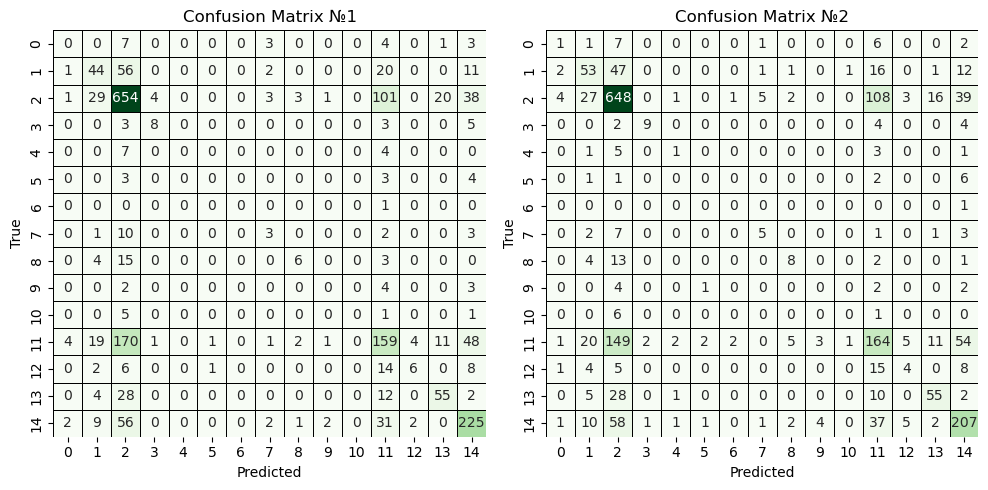

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example list of indices (replace with your actual list)
inds = [131, 245]#[291, 338]

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(1, len(inds), figsize=(10, 5))

for idx, i in enumerate(inds):
    # Чтение данных из файла без заголовков
    file_path = f'individuals/individual_g0_i{i}_predictions.txt'
    data = pd.read_csv(file_path, header=None, sep=", ")

    # Присвоение названий колонкам
    data.columns = ['index', 'true', 'pred']

    # Извлечение истинных и предсказанных значений
    true_classes = data['true']
    predicted_classes = data['pred']

    # Вычисление матрицы конфузий
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Визуализация матрицы конфузий с помощью seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=0.5, linecolor='black', ax=axes[idx])
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
    axes[idx].set_title(f'Confusion Matrix №{idx+1}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('CMs.pdf')
plt.show()

In [21]:
df_[df_['accuracy'] >0.575]

,num_layers,neurons_per_layer,activation_functions,optimizer,alpha,loss_function,accuracy,filename
161,2,"[71, 126]","['tanh', 'tanh']",adagrad,0.100,categorical_crossentropy,0.577789,individual_g0_i245_params.txt
35,2,"[64, 28]","['gelu', 'softsign']",adam,0.001,categorical_crossentropy,0.580290,individual_g0_i131_params.txt


C:\Users\ivan\AppData\Local\Temp\ipykernel_11632\44120482.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_11632\44120482.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")


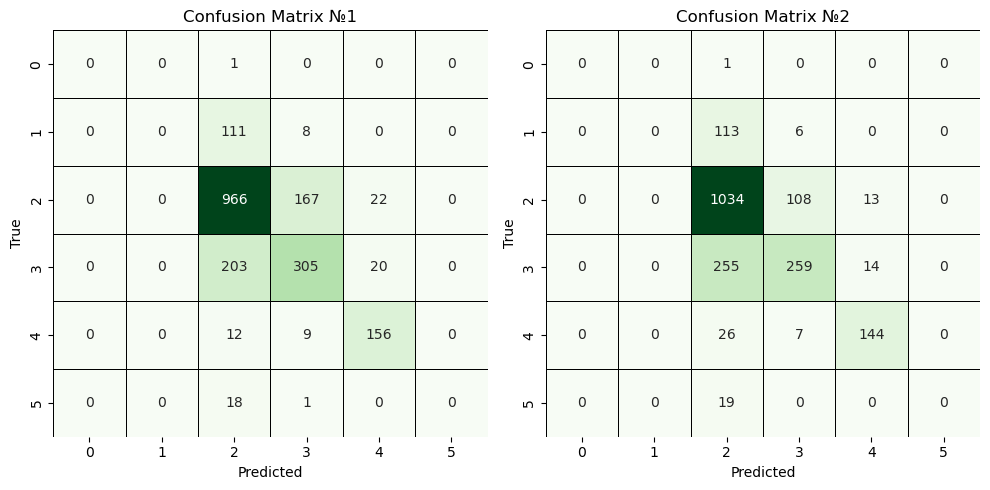

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example list of indices (replace with your actual list)
inds = [291, 338]

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(1, len(inds), figsize=(10, 5))

for idx, i in enumerate(inds):
    # Чтение данных из файла без заголовков
    file_path = f'individuals_size/individual_g0_i{i}_predictions.txt'
    data = pd.read_csv(file_path, header=None, sep=", ")

    # Присвоение названий колонкам
    data.columns = ['index', 'true', 'pred']

    # Извлечение истинных и предсказанных значений
    true_classes = data['true']
    predicted_classes = data['pred']

    # Вычисление матрицы конфузий
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Визуализация матрицы конфузий с помощью seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=0.5, linecolor='black', ax=axes[idx])
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
    axes[idx].set_title(f'Confusion Matrix №{idx+1}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('CMs_size.pdf')
plt.show()

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os


# Load the dataset
data = pd.read_excel('data_to_train.xlsx')

# Split data into features and target
X = data.drop(['landslide_size', 'landslide_trigger'], axis=1)
y = data['landslide_trigger']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_test)
y_categorical = to_categorical(y_encoded)





# Create a mapping dictionary to relate original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping to verify
print("Label Mapping:", label_mapping)

# Example of how to decode labels back to original
decoded_labels = label_encoder.inverse_transform(np.argmax(y_categorical, axis=1))
print("Decoded Labels Example:", decoded_labels[:10])

Label Mapping: {'construction': 0, 'continuous_rain': 1, 'downpour': 2, 'earthquake': 3, 'flooding': 4, 'freeze_thaw': 5, 'leaking_pipe': 6, 'mining': 7, 'monsoon': 8, 'no_apparent_trigger': 9, 'other': 10, 'rain': 11, 'snowfall_snowmelt': 12, 'tropical_cyclone': 13, 'unknown': 14}
Decoded Labels Example: ['downpour' 'downpour' 'downpour' 'downpour' 'downpour' 'downpour'
 'downpour' 'monsoon' 'unknown' 'rain']


In [37]:
label_mapping

{'construction': 0,
 'continuous_rain': 1,
 'downpour': 2,
 'earthquake': 3,
 'flooding': 4,
 'freeze_thaw': 5,
 'leaking_pipe': 6,
 'mining': 7,
 'monsoon': 8,
 'no_apparent_trigger': 9,
 'other': 10,
 'rain': 11,
 'snowfall_snowmelt': 12,
 'tropical_cyclone': 13,
 'unknown': 14}

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os


# Load the dataset
data = pd.read_excel('data_to_train.xlsx')

# Split data into features and target
X = data.drop(['landslide_size', 'landslide_trigger'], axis=1)
y = data['landslide_size']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_test)
y_categorical = to_categorical(y_encoded)





# Create a mapping dictionary to relate original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

label_mapping


{'catastrophic': 0,
 'large': 1,
 'medium': 2,
 'small': 3,
 'unknown': 4,
 'very_large': 5}

In [2]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the data from a text file
data = pd.read_csv(r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i408_predictions.txt', header=None, names=['index', 'true', 'pred'])

# Extract true and predicted values
y_true = data['true']
y_pred = data['pred']

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.25
Recall: 0.14
F1 Score: 0.14


D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import pandas as pd
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the directory containing the files
directory = r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals'

# Create a list to store results
results = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if 'predictions' in filename and filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        print(file_path)
        # Load the data from the text file
        data = pd.read_csv(file_path, header=None, names=['index', 'true', 'pred'])
        
        # Extract true and predicted values
        y_true = data['true']
        y_pred = data['pred']
        
        # Compute precision, recall, and F1 score
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        print(precision)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        print(recall)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        print(f1)
        
        # Append results to the list
        results.append({
            'File': filename,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel(r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\metrics_summary.xlsx', index=False)

print("Metrics have been calculated and saved to metrics_summary.xlsx")


C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i0_predictions.txt
0.13943107256335996
0.12233395096283674
0.11523703230566121
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i100_predictions.txt
0.3037887261958108
0.19138849135545305
0.21259390873435138
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i101_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i102_predictions.txt
0.09687451124302257
0.11723691604615244
0.1055549415661566
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i103_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i104_predictions.txt
0.09353732035989679
0.10908738264059319
0.09027355011812314
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i105_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\

0.23015699783451904
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i158_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i159_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i15_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i160_predictions.txt
0.2872386874563306
0.20287026631604632
0.2221095915000146
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i161_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i162_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i163_predictions.txt
0.27311997126844195
0.25290580006401503
0.260682423

0.13246308972283227
0.14084200076985898
0.13332848870210634
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i211_predictions.txt
0.29517023606695414
0.1473659679278188
0.15475175354276813
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i212_predictions.txt
0.06990107873135072
0.10638137818465689
0.0833789598352368
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i213_predictions.txt
0.12273169654389653
0.1046579110285491
0.08998728851864182
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i214_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i215_predictions.txt
0.3700140030905605
0.1646853680847926
0.1829855350108067
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i216_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i217_predictions.txt
0.063091148070065

0.3197051742941985
0.2019517338999781
0.2252744462235486
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i268_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i269_predictions.txt
0.2270136095718488
0.15677271434479098
0.16326923269181826
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i26_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i270_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i271_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i272_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i273_predictions.txt
0.06708310435

0.13086167635342633
0.11162557172014408
0.0958919730799817
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i323_predictions.txt
0.13139312449932325
0.14005400030454573
0.1341664883526893
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i324_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i325_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i326_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i327_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i328_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i329_predictions.txt
0.00023368

0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i381_predictions.txt
0.032555326853096055
0.07091625150525459
0.010540248878848944
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i382_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i383_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i384_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i385_predictions.txt
0.2702298164497862
0.16706822269016497
0.17554899556944858
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i386_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i387_predictions.txt
0.13844

0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i69_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i6_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i70_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i71_predictions.txt
0.02848090712022678
0.06666666666666667
0.039911204579974296
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i72_predictions.txt
0.2710866409698409
0.15444452113450383
0.1679721960237982
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i73_predictions.txt
0.09771831809646936
0.12060237682526534
0.1078507778518548
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals\individual_g0_i74_predictions.txt
0.02848090712022678
0.06666666666666667
0.03991120457997429

In [5]:
import pandas as pd
import os
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the directory containing the files
directory = r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size'

# Create a list to store results
results = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if 'predictions' in filename and filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        print(file_path)
        # Load the data from the text file
        data = pd.read_csv(file_path, header=None, names=['index', 'true', 'pred'])
        
        # Extract true and predicted values
        y_true = data['true']
        y_pred = data['pred']
        
        # Compute precision, recall, F1 score, and accuracy
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        print(precision)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        print(recall)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        print(f1)
        accuracy = accuracy_score(y_true, y_pred)
        
        # Append results to the list
        results.append({
            'File': filename,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel(r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\metrics_summary_size.xlsx', index=False)

print("Metrics have been calculated and saved to metrics_summary.xlsx")


C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i0_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i100_predictions.txt
0.3370106564232893
0.3740230696798494
0.35339765479614105
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i101_predictions.txt
0.35011474167430534
0.3627616968718663
0.3529103477976956
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i102_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i103_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i104_predictions.txt
0.38336938063828824
0.3797250564324343
0.3748896535748963
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i105_predictions.txt
0.3820268366985962
0.38672728207872775
0.38343

0.46401978667944627
0.4097103393434794
0.40034096754187115
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i152_predictions.txt
0.3624247243354461
0.3743431591948541
0.3679315098264074
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i153_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i154_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i155_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i156_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i157_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i15

0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i209_predictions.txt
0.351396940586028
0.36837335216572503
0.358437093529322
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i20_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i210_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i211_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i212_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i213_predictions.txt
0.20075678408080141
0.28642600337515595
0.23574034952947956
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i214

0.3396913708196259
0.36173325262308315
0.35009413104411413
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i267_predictions.txt
0.2077391936475983
0.16875901875901878
0.12715342119118908
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i268_predictions.txt
0.3687244633731311
0.34101945606182893
0.32870275076307126
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i269_predictions.txt
0.3353700647530826
0.364013622911928
0.34660958780999623
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i26_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i270_predictions.txt
0.4000628212554955
0.38539020384733247
0.3841308487645436
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i271_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i272_pre

0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i323_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i324_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i325_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i326_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i327_predictions.txt
0.40439773253930866
0.37262547674437
0.36697809932907766
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i328_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i3

0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i37_predictions.txt
0.3484389818243782
0.37389283268520557
0.36031513000457105
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i380_predictions.txt
0.3595476156857036
0.3657085381661653
0.36174768315051
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i381_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i382_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i383_predictions.txt
0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i384_predictions.txt
0.3199301526609186
0.35826301758505147
0.3367585732692624
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i385_pre

0.09629814907453726
0.16666666666666666
0.12206721623335447
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i7_predictions.txt
0.3200919602274343
0.36202017144813753
0.3384549775874796
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i80_predictions.txt
0.49630448395439836
0.3436056009460795
0.33356171408609336
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i81_predictions.txt
0.38500935095057515
0.3796787217711944
0.3751164679063888
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i82_predictions.txt
0.35058330008825056
0.3637828038251767
0.3535282049755695
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i83_predictions.txt
0.3256853952010846
0.3431810538802065
0.3301686476089329
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i84_predictions.txt
0.3181743137048241
0.3694488773937927
0.339646177043952
C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\individuals_size\individual_g0_i85_predictions.txt


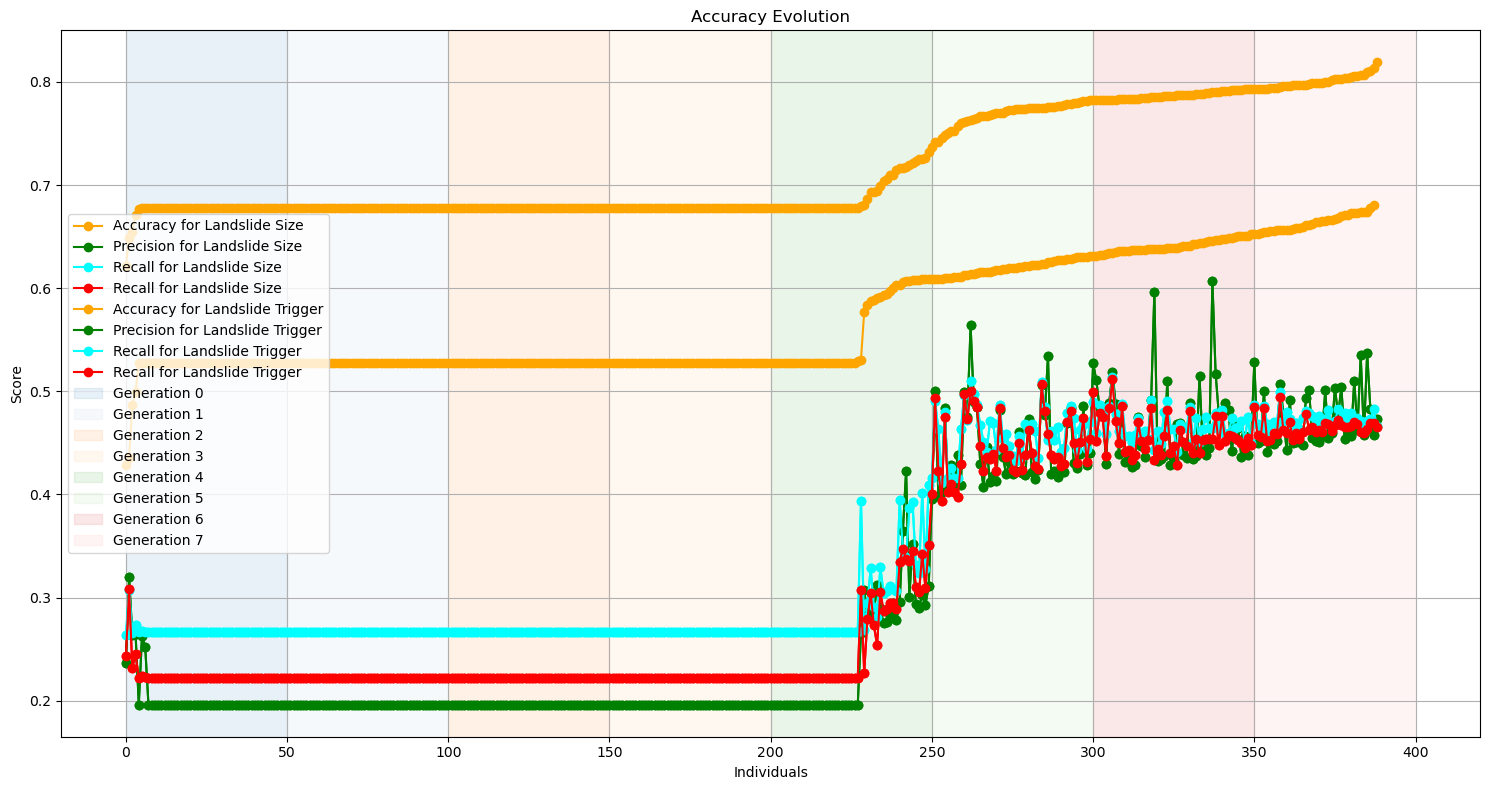

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('metrics_summary_size.xlsx')
df = df[df['Accuracy'] >0.3].sort_values(by='Accuracy', ascending=True)

df_ = pd.read_excel('metrics_summary.xlsx')
df_ = df_[df_['Accuracy'] >0.3].sort_values(by='Accuracy', ascending=True)

# Строим график
plt.figure(figsize=(15, 8))

epochs = np.arange(df.shape[0])

epochs_ = np.arange(df_.shape[0])

# Кривые для validation
#plt.plot(epochs, df['f1_score'], marker='o', linestyle='-', color='blue', label='$F_1$ Score')
plt.plot(epochs, df['Accuracy']+0.1, marker='o', linestyle='-', color='orange', label='Accuracy for Landslide Size')
plt.plot(epochs, df['Precision']+0.1, marker='o', linestyle='-', color='green', label='Precision for Landslide Size')
plt.plot(epochs, df['Recall']+0.1, marker='o', linestyle='-', color='cyan', label='Recall for Landslide Size')
plt.plot(epochs, df['F1 Score']+0.1, marker='o', linestyle='-', color='red', label='Recall for Landslide Size')

plt.plot(epochs_, df_['Accuracy']+0.1, marker='o', linestyle='-', color='orange', label='Accuracy for Landslide Trigger')
plt.plot(epochs, df['Precision']+0.1, marker='o', linestyle='-', color='green', label='Precision for Landslide Trigger')
plt.plot(epochs, df['Recall']+0.1, marker='o', linestyle='-', color='cyan', label='Recall for Landslide Trigger')
plt.plot(epochs, df['F1 Score']+0.1, marker='o', linestyle='-', color='red', label='Recall for Landslide Trigger')


for i in range(0, df.shape[0], 50):
    plt.axvspan(i, i + 50, color=plt.cm.tab20(i // 50), alpha=0.1, label=f'Generation {i // 50}')


# Настройки графика
plt.title('Accuracy Evolution')
plt.xlabel('Individuals')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.savefig('indiv_all_.pdf')
plt.show()

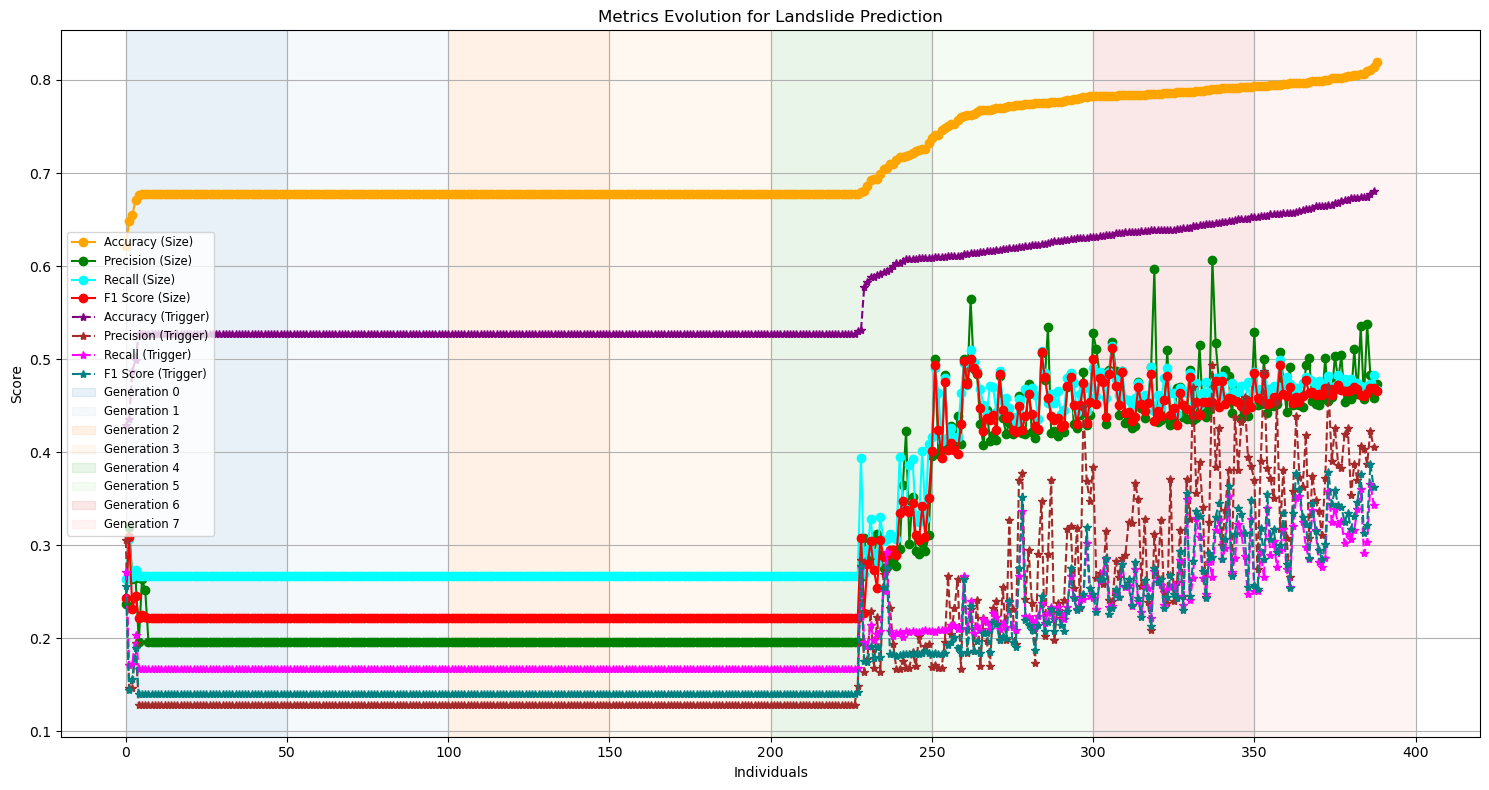

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and filter datasets
df = pd.read_excel('metrics_summary_size.xlsx')
df = df[df['Accuracy'] > 0.3].sort_values(by='Accuracy', ascending=True)

df_ = pd.read_excel('metrics_summary.xlsx')
df_ = df_[df_['Accuracy'] > 0.3].sort_values(by='Accuracy', ascending=True)

# Initialize the plot
plt.figure(figsize=(15, 8))

epochs = np.arange(df.shape[0])
epochs_ = np.arange(df_.shape[0])

# Plot curves for Landslide Size metrics
plt.plot(epochs, df['Accuracy'] + 0.1, marker='o', linestyle='-', color='orange', label='Accuracy (Size)')
plt.plot(epochs, df['Precision'] + 0.1, marker='o', linestyle='-', color='green', label='Precision (Size)')
plt.plot(epochs, df['Recall'] + 0.1, marker='o', linestyle='-', color='cyan', label='Recall (Size)')
plt.plot(epochs, df['F1 Score'] + 0.1, marker='o', linestyle='-', color='red', label='F1 Score (Size)')

# Plot curves for Landslide Trigger metrics with different colors
plt.plot(epochs_, df_['Accuracy'] + 0.1, marker='*', linestyle='--', color='purple', label='Accuracy (Trigger)')
plt.plot(epochs_, df_['Precision'] + 0.1, marker='*', linestyle='--', color='brown', label='Precision (Trigger)')
plt.plot(epochs_, df_['Recall'] + 0.1, marker='*', linestyle='--', color='magenta', label='Recall (Trigger)')
plt.plot(epochs_, df_['F1 Score'] + 0.1, marker='*', linestyle='--', color='teal', label='F1 Score (Trigger)')

# Add vertical spans
for i in range(0, df.shape[0], 50):
    plt.axvspan(i, i + 50, color=plt.cm.tab20(i // 50), alpha=0.1, label=f'Generation {i // 50}')

# Add plot settings
plt.title('Metrics Evolution for Landslide Prediction')
plt.xlabel('Individuals')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='best', fontsize='small')

# Save and show the plot
plt.tight_layout()
plt.savefig('indiv_all_optimized.pdf')
plt.show()
